In [1]:
import math
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Assignment1\\DataSet\\HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
df_org = df.copy()


dt = df.dtypes

In [2]:
print( df.head().T )
print('-----------------------')
print( df.dtypes )

                       0        1        2     3        4
TARGET_BAD_FLAG        1        1        1     1        0
TARGET_LOSS_AMT      641     1109      767  1425      NaN
LOAN                1100     1300     1500  1500     1700
MORTDUE            25860    70053    13500   NaN    97800
VALUE              39025    68400    16700   NaN   112000
REASON           HomeImp  HomeImp  HomeImp   NaN  HomeImp
JOB                Other    Other    Other   NaN   Office
YOJ                 10.5        7        4   NaN        3
DEROG                  0        0        0   NaN        0
DELINQ                 0        2        0   NaN        0
CLAGE            94.3667  121.833  149.467   NaN  93.3333
NINQ                   1        0        1   NaN        0
CLNO                   9       14       10   NaN       14
DEBTINC              NaN      NaN      NaN   NaN      NaN
-----------------------
TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float6

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


In [4]:
x = df.describe().T

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)
##
print("  ")
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
  
 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [5]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

 here is i ..... TARGET_BAD_FLAG  ..... and here is the type int64
 here is i ..... TARGET_LOSS_AMT  ..... and here is the type float64
 here is i ..... LOAN  ..... and here is the type int64
 here is i ..... MORTDUE  ..... and here is the type float64
 here is i ..... VALUE  ..... and here is the type float64
 here is i ..... YOJ  ..... and here is the type float64
 here is i ..... DEROG  ..... and here is the type float64
 here is i ..... DELINQ  ..... and here is the type float64
 here is i ..... CLAGE  ..... and here is the type float64
 here is i ..... NINQ  ..... and here is the type float64
 here is i ..... CLNO  ..... and here is the type float64
 here is i ..... DEBTINC  ..... and here is the type float64
 here is i ..... IMP_REASON  ..... and here is the type object
 here is i ..... IMP_JOB  ..... and here is the type object


In [6]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860,70053,13500,NaN,97800
VALUE,39025,68400,16700,NaN,112000
YOJ,10.5,7,4,NaN,3
DEROG,0,0,0,NaN,0
DELINQ,0,2,0,NaN,0
CLAGE,94.3667,121.833,149.467,NaN,93.3333
NINQ,1,0,1,NaN,0


In [7]:
dt = df.dtypes
objList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )

 here is i ..... TARGET_BAD_FLAG  ..... and here is the type int64
 here is i ..... TARGET_LOSS_AMT  ..... and here is the type float64
 here is i ..... LOAN  ..... and here is the type int64
 here is i ..... MORTDUE  ..... and here is the type float64
 here is i ..... VALUE  ..... and here is the type float64
 here is i ..... YOJ  ..... and here is the type float64
 here is i ..... DEROG  ..... and here is the type float64
 here is i ..... DELINQ  ..... and here is the type float64
 here is i ..... CLAGE  ..... and here is the type float64
 here is i ..... NINQ  ..... and here is the type float64
 here is i ..... CLNO  ..... and here is the type float64
 here is i ..... DEBTINC  ..... and here is the type float64
 here is i ..... IMP_REASON  ..... and here is the type object
 here is i ..... IMP_JOB  ..... and here is the type object


In [8]:
g = df.groupby("IMP_JOB")
i = "MORTDUE"
print( g[i].median() )

IMP_JOB
MISSING    58936.0
Mgr        76600.0
Office     62970.5
Other      54834.0
ProfExe    82802.5
Sales      71800.0
Self       88465.0
Name: MORTDUE, dtype: float64


In [9]:
g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64


In [10]:
g = df.groupby("IMP_REASON")
i = "NINQ"
print( g[i].median() )

IMP_REASON
DebtCon    1.0
HomeImp    0.0
MISSING    0.0
Name: NINQ, dtype: float64


In [11]:
i = "MORTDUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 58936
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 76600
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 62970
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 54834
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 82802
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 71800
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 88465
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 78227
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 101258
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 89094
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 76599
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 110007
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 84473
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 130631
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "NINQ"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 1
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 0
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 0

df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


for i in objList:
    df = df.drop( i, axis=1 )


df.head().T


,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
z_IMP_REASON_DebtCon,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_REASON_HomeImp,1.000000,1.000000,1.000000,0.000000,1.000000
z_IMP_REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
z_IMP_JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
z_IMP_JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
z_IMP_JOB_Other,1.000000,1.000000,1.000000,0.000000,0.000000


In [12]:
#Remove the Target Variables, Missing Flag fields and the Categorical Flag Fields

df_newTest = df.loc[:, ~df.columns.str.startswith('M_')]
df_newTest = df_newTest.loc[:, ~df_newTest.columns.str.startswith('z_')]
df_newTest = df_newTest.drop( ['TARGET_BAD_FLAG','TARGET_LOSS_AMT'], axis=1 )

df_newTest.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
IMP_MORTDUE,5960.0,72559.197013,42732.957883,2063.000000,48139.000000,62970.000000,88465.000000,399550.000000
IMP_VALUE,5960.0,101553.332054,56906.421205,8000.000000,66489.500000,89094.000000,119144.750000,855909.000000
IMP_NINQ,5960.0,1.127349,1.670567,0.000000,0.000000,1.000000,2.000000,17.000000
IMP_YOJ,5960.0,8.756166,7.259424,0.000000,3.000000,7.000000,12.000000,41.000000
IMP_DEROG,5960.0,0.224329,0.798458,0.000000,0.000000,0.000000,0.000000,10.000000
IMP_DELINQ,5960.0,0.405705,1.079256,0.000000,0.000000,0.000000,0.000000,15.000000
IMP_CLAGE,5960.0,179.440725,83.574697,0.000000,117.371430,173.466667,227.143058,1168.233561
IMP_CLNO,5960.0,21.247819,9.951308,0.000000,15.000000,20.000000,26.000000,71.000000
IMP_DEBTINC,5960.0,34.000651,7.644528,0.524499,30.763159,34.818262,37.949892,203.312149


In [13]:
z = np.abs(stats.zscore(df_newTest))
print(z)
print( "\n\n")

df_newTest_NoOutliers = df_newTest[(z < 3).all(axis=1)]

print("Records and Columns with Outliers")
print(df_newTest.shape)
print("Records and Columns without Outliers")
print(df_newTest_NoOutliers.shape)

[[1.5622993  1.09290621 1.0988844  ... 1.01802579 1.23087808 0.10696269]
 [1.54445258 0.05865279 0.58264275 ... 0.68935009 0.72838939 0.10696269]
 [1.52660585 1.38216859 1.49122805 ... 0.35868001 1.13038034 0.10696269]
 ...
 [6.29918148 0.4332897  0.15165347 ... 0.39296256 0.62789165 0.20355343]
 [6.35272165 0.51929611 0.17033482 ... 0.41226443 0.52739392 0.04451025]
 [6.36164501 0.55578155 0.22177446 ... 0.48057185 0.52739392 0.07468295]]



Records and Columns with Outliers
(5960, 10)
Records and Columns without Outliers
(5241, 10)


In [14]:
df_newTest_NoOutliers.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5241.0,17388.265598,8887.417647,1100.000000,10900.000000,15900.000000,22400.000000,52200.000000
IMP_MORTDUE,5241.0,69035.790952,34184.161035,2063.000000,48000.000000,62970.000000,86177.000000,200731.000000
IMP_VALUE,5241.0,96981.217142,44355.450515,8000.000000,66251.000000,88105.000000,117279.000000,271676.000000
IMP_NINQ,5241.0,0.947338,1.226260,0.000000,0.000000,1.000000,1.000000,6.000000
IMP_YOJ,5241.0,8.609760,6.992389,0.000000,3.000000,7.000000,12.000000,30.000000
IMP_DEROG,5241.0,0.120206,0.392747,0.000000,0.000000,0.000000,0.000000,2.000000
IMP_DELINQ,5241.0,0.253768,0.636439,0.000000,0.000000,0.000000,0.000000,3.000000
IMP_CLAGE,5241.0,177.224615,77.074246,0.507115,117.045501,173.466667,224.601376,427.923591
IMP_CLNO,5241.0,20.742606,9.152856,0.000000,15.000000,20.000000,26.000000,51.000000
IMP_DEBTINC,5241.0,33.863771,6.102162,11.652739,30.674205,34.818262,37.950788,55.962022


In [15]:
# STANDARD SCALER

print(" STANDARDIZING THE DATA \n\n\n")

theScaler = StandardScaler()
theScaler.fit( df_newTest_NoOutliers )

varNames = df_newTest_NoOutliers.columns

Y_STD = theScaler.transform( df_newTest_NoOutliers )
Y_STD = pd.DataFrame( Y_STD )
print( Y_STD.head() )
print( "\n\n")

 STANDARDIZING THE DATA 



          0         1         2         3         4         5         6  \
0 -1.832908 -1.263155 -1.306756  0.042949  0.270354 -0.306094 -0.398769   
1 -1.810402  0.029760 -0.644429 -0.772616 -0.230238 -0.306094  2.744014   
2 -1.787896 -1.624761 -1.810124  0.042949 -0.659317 -0.306094 -0.398769   
3 -1.787896 -0.295481 -0.422857 -0.772616 -0.230238 -0.306094 -0.398769   
4 -1.765390  0.841529  0.338633 -0.772616 -0.802343 -0.306094 -0.398769   

          7         8         9  
0 -1.075143 -1.283067  0.156433  
1 -0.718743 -0.736737  0.156433  
2 -0.360180 -1.173801  0.156433  
3 -0.048762 -0.081142  0.156433  
4 -1.088552 -0.736737  0.156433  





In [16]:
varNames_std = []
for i in varNames :
    newName = "std_" + i
    varNames_std.append( newName )

Y_STD.columns = varNames_std
print( Y_STD.head() )
print( "\n\n")

print( Y_STD.describe() )
print( "\n\n")

   std_LOAN  std_IMP_MORTDUE  std_IMP_VALUE  std_IMP_NINQ  std_IMP_YOJ  \
0 -1.832908        -1.263155      -1.306756      0.042949     0.270354   
1 -1.810402         0.029760      -0.644429     -0.772616    -0.230238   
2 -1.787896        -1.624761      -1.810124      0.042949    -0.659317   
3 -1.787896        -0.295481      -0.422857     -0.772616    -0.230238   
4 -1.765390         0.841529       0.338633     -0.772616    -0.802343   

   std_IMP_DEROG  std_IMP_DELINQ  std_IMP_CLAGE  std_IMP_CLNO  std_IMP_DEBTINC  
0      -0.306094       -0.398769      -1.075143     -1.283067         0.156433  
1      -0.306094        2.744014      -0.718743     -0.736737         0.156433  
2      -0.306094       -0.398769      -0.360180     -1.173801         0.156433  
3      -0.306094       -0.398769      -0.048762     -0.081142         0.156433  
4      -0.306094       -0.398769      -1.088552     -0.736737         0.156433  



           std_LOAN  std_IMP_MORTDUE  std_IMP_VALUE  std_IMP_NINQ 

In [17]:
#the shape arguement here is just telling us how many variables we have so MAX_N = 4, we are creating 4 Principal Components
MAX_N = Y_STD.shape[1]
pca = PCA(n_components=MAX_N)
pca.fit( Y_STD )

#this is telling us how much information is in each of the components
#the 1st variable has as much info as almost 3 variables, the 2nd has almost 1, so we can do with out the third and 4th PC
ev = pca.explained_variance_
print("Eigen Values")
print(ev)
print("\n\n")

Eigen Values
[2.27808301 1.37139847 1.23001024 1.0266708  0.98025368 0.8462313
 0.78267151 0.74282464 0.61442712 0.12933762]





In [18]:
# we see that 98% of the information contained in the first 9 PCs we can remove the 10th 
#we get 96% of the information

varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

2.28 variation= 22 %  total= 22 %
1.37 variation= 13 %  total= 36 %
1.23 variation= 12 %  total= 48 %
1.03 variation= 10 %  total= 59 %
0.98 variation= 9 %  total= 68 %
0.85 variation= 8 %  total= 77 %
0.78 variation= 7 %  total= 85 %
0.74 variation= 7 %  total= 92 %
0.61 variation= 6 %  total= 98 %
0.13 variation= 1 %  total= 100 %


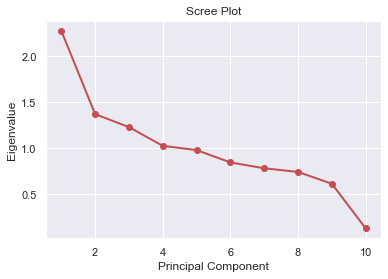

In [19]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , ev, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

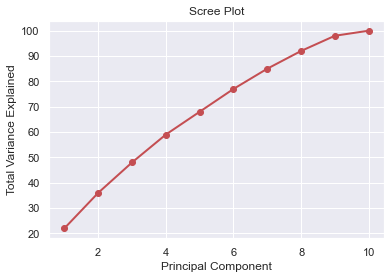

In [20]:
##Another way of looking at the Scree Plot with Cumulative Variance%
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

In [21]:
dfc = pd.DataFrame( pca.components_ )
dfc.columns = varNames
print( dfc )

       LOAN  IMP_MORTDUE  IMP_VALUE  IMP_NINQ   IMP_YOJ  IMP_DEROG  \
0  0.288181     0.570516   0.593935  0.088145  0.006325  -0.029298   
1 -0.097054    -0.023896  -0.094599  0.531508 -0.277917   0.446462   
2  0.037774    -0.234228  -0.163641  0.069229  0.578721   0.165175   
3 -0.356770     0.251526   0.191823 -0.514567 -0.190419   0.303424   
4  0.620293    -0.016486   0.094351  0.025199  0.169377   0.587884   
5 -0.121831    -0.096695  -0.108221  0.145045 -0.505949   0.313428   
6  0.333195    -0.183281  -0.122333 -0.492546 -0.322638   0.131745   
7  0.495199    -0.162279  -0.073009  0.089357 -0.386529  -0.455224   
8 -0.089690     0.132842   0.145279  0.409601 -0.111860  -0.109411   
9 -0.122186    -0.684557   0.716032  0.011234 -0.029317   0.007948   

   IMP_DELINQ  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  
0   -0.034104   0.199901  0.374866     0.219976  
1    0.358828  -0.330118  0.147624     0.403070  
2    0.419013   0.508439  0.340378     0.000319  
3    0.531074  -0.034427 -0.0

In [43]:
pca = PCA(n_components=MAX_N)
pca.fit( Y_STD )


X_PCA = pca.transform( Y_STD )
X_PCA = pd.DataFrame( X_PCA )
# taking all the rows = :  and only taking columns 0 and 1, stopping at 2 not including 2
X_PCA = X_PCA.iloc[:,0:5]


colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )
    
X_PCA.columns = pcaNames

print( X_PCA.head() )
print("\n\n")

       PC_1      PC_2      PC_3      PC_4      PC_5
0 -2.658412  0.228203 -0.601070 -0.283660 -0.861568
1 -1.427109  0.928828  0.326430  2.323599 -1.374105
2 -2.972708  0.318572 -0.569613 -0.336563 -1.172410
3 -0.987707 -0.338656 -0.385871  0.573674 -1.373721
4 -0.337499 -0.034576 -1.858860  1.152915 -1.056985





In [44]:
X_PCA[ "TARGET_BAD_FLAG" ] = df_org.TARGET_BAD_FLAG
X_PCA[ "TARGET_LOSS_AMT" ] = df_org.TARGET_LOSS_AMT
X_PCA[ "REASON" ] = df_org.REASON
X_PCA[ "JOB" ] = df_org.JOB

print( X_PCA.head() )
print( "\n\n")

dt3 = X_PCA.dtypes

objList3 = []

for i in dt3.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt3[i] in (["object"]) : objList3.append( i )

for i in objList3 :
    if X_PCA[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    X_PCA[NAME] = X_PCA[i]
    X_PCA[NAME] = X_PCA[NAME].fillna("MISSING")
    g = X_PCA.groupby( NAME )
    X_PCA = X_PCA.drop( i, axis=1 )
X_PCA.head().T


       PC_1      PC_2      PC_3      PC_4      PC_5  TARGET_BAD_FLAG  \
0 -2.658412  0.228203 -0.601070 -0.283660 -0.861568                1   
1 -1.427109  0.928828  0.326430  2.323599 -1.374105                1   
2 -2.972708  0.318572 -0.569613 -0.336563 -1.172410                1   
3 -0.987707 -0.338656 -0.385871  0.573674 -1.373721                1   
4 -0.337499 -0.034576 -1.858860  1.152915 -1.056985                0   

   TARGET_LOSS_AMT   REASON     JOB  
0            641.0  HomeImp   Other  
1           1109.0  HomeImp   Other  
2            767.0  HomeImp   Other  
3           1425.0      NaN     NaN  
4              NaN  HomeImp  Office  





,0,1,2,3,4
PC_1,-2.65841,-1.42711,-2.97271,-0.987707,-0.337499
PC_2,0.228203,0.928828,0.318572,-0.338656,-0.0345762
PC_3,-0.60107,0.32643,-0.569613,-0.385871,-1.85886
PC_4,-0.28366,2.3236,-0.336563,0.573674,1.15291
PC_5,-0.861568,-1.37411,-1.17241,-1.37372,-1.05699
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
IMP_REASON,HomeImp,HomeImp,HomeImp,MISSING,HomeImp
IMP_JOB,Other,Other,Other,MISSING,Office


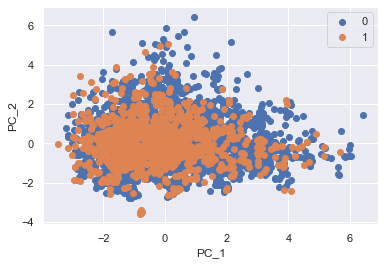

In [45]:
for Name, Group in X_PCA.groupby("TARGET_BAD_FLAG"):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()